**Задание 1.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mailfit — Тестовое задание на позицию аналитика 2.xlsx to Mailfit — Тестовое задание на позицию аналитика 2.xlsx
Saving Mailfit — Тестовое задание на позицию аналитика.xlsx to Mailfit — Тестовое задание на позицию аналитика.xlsx


In [ ]:
list_1 = pd.read_csv('Mailfit — Тестовое задание на позицию аналитика - data 1_1.csv')
list_2 = pd.read_csv('Mailfit — Тестовое задание на позицию аналитика - data 1_2.csv')

In [ ]:
list_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Тема письма       42 non-null     object
 1   Сегмент           42 non-null     object
 2   Дата рассылки     42 non-null     object
 3   Время отправки    42 non-null     object
 4   Отправлено писем  42 non-null     int64 
 5   Отписки           42 non-null     int64 
 6   Доставлено        42 non-null     int64 
 7   Открытий          42 non-null     int64 
 8   Заказы            42 non-null     int64 
 9   Доход             42 non-null     int64 
dtypes: int64(6), object(4)
memory usage: 3.4+ KB


In [ ]:
list_1.head()

,Тема письма,Сегмент,Дата рассылки,Время отправки,Отправлено писем,Отписки,Доставлено,Открытий,Заказы,Доход
0,Тема1,Сегмент1,04.06.2021,15:00:00,561114,440,560873,70321,75,7613776
1,Тема2,Сегмент1,07.06.2021,17:22:00,557128,476,556910,88384,209,6907996
2,Тема3,Сегмент1,11.06.2021,16:00:00,555455,504,555214,70835,70,3558583
3,Тема4,Сегмент2,14.06.2021,15:00:00,554383,509,554144,74813,75,6207904
4,Тема5,Сегмент1,18.06.2021,16:00:00,552486,435,552281,71378,52,6905844


In [ ]:
list_1 = list_1.rename(columns={'Доход ':'Доход'})

Преобразуем тип данных в колонке дата расслыки

In [ ]:
list_1['Дата рассылки'] = pd.to_datetime(list_1['Дата рассылки'])
list_1['Дата рассылки'] = pd.to_datetime(list_1['Дата рассылки'], format='%Y-%m-%dT')

Созданим колонку open_rate и рассчитаем метрику

In [ ]:
list_1['open_rate'] = list_1['Открытий'] / list_1['Отправлено писем']

Объединим две талбицы, что бы рассчитать CR

In [ ]:
list_3 = list_1.set_index('Тема письма').join(list_2.set_index('Тема письма'))
list_3.head()

,Сегмент,Дата рассылки,Время отправки,Отправлено писем,Отписки,Доставлено,Открытий,Заказы,Доход,open_rate,Кликов
Тема письма,,,,,,,,,,,
Тема1,Сегмент1,2021-04-06,15:00:00,561114,440,560873,70321,75,7613776,0.125324,2274
Тема2,Сегмент1,2021-07-06,17:22:00,557128,476,556910,88384,209,6907996,0.158642,4549
Тема3,Сегмент1,2021-11-06,16:00:00,555455,504,555214,70835,70,3558583,0.127526,1709
Тема4,Сегмент2,2021-06-14,15:00:00,554383,509,554144,74813,75,6207904,0.134948,2136
Тема5,Сегмент1,2021-06-18,16:00:00,552486,435,552281,71378,52,6905844,0.129194,1635


In [ ]:
list_3['CR'] = list_3['Заказы'] / list_3['Кликов']

In [ ]:
list_3['AOV'] = list_3['Доход'] / list_3['Заказы']

In [ ]:
list_3.head()

,Сегмент,Дата рассылки,Время отправки,Отправлено писем,Отписки,Доставлено,Открытий,Заказы,Доход,open_rate,Кликов,CR,AOV
Тема письма,,,,,,,,,,,,,
Тема1,Сегмент1,2021-04-06,15:00:00,561114,440,560873,70321,75,7613776,0.125324,2274,0.032982,101517.013333
Тема2,Сегмент1,2021-07-06,17:22:00,557128,476,556910,88384,209,6907996,0.158642,4549,0.045944,33052.612440
Тема3,Сегмент1,2021-11-06,16:00:00,555455,504,555214,70835,70,3558583,0.127526,1709,0.040960,50836.900000
Тема4,Сегмент2,2021-06-14,15:00:00,554383,509,554144,74813,75,6207904,0.134948,2136,0.035112,82772.053333
Тема5,Сегмент1,2021-06-18,16:00:00,552486,435,552281,71378,52,6905844,0.129194,1635,0.031804,132804.692308


Созданим столбцы с названием месяца и днем недели.

In [ ]:
list_3['month'] = list_3['Дата рассылки'].dt.month_name()
list_3['day'] = list_3['Дата рассылки'].dt.day_name()

In [ ]:
list_3.head()

,Сегмент,Дата рассылки,Время отправки,Отправлено писем,Отписки,Доставлено,Открытий,Заказы,Доход,open_rate,Кликов,CR,AOV,month,day
Тема письма,,,,,,,,,,,,,,,
Тема1,Сегмент1,2021-04-06,15:00:00,561114,440,560873,70321,75,7613776,0.125324,2274,0.032982,101517.013333,April,Tuesday
Тема2,Сегмент1,2021-07-06,17:22:00,557128,476,556910,88384,209,6907996,0.158642,4549,0.045944,33052.612440,July,Tuesday
Тема3,Сегмент1,2021-11-06,16:00:00,555455,504,555214,70835,70,3558583,0.127526,1709,0.040960,50836.900000,November,Saturday
Тема4,Сегмент2,2021-06-14,15:00:00,554383,509,554144,74813,75,6207904,0.134948,2136,0.035112,82772.053333,June,Monday
Тема5,Сегмент1,2021-06-18,16:00:00,552486,435,552281,71378,52,6905844,0.129194,1635,0.031804,132804.692308,June,Friday


In [ ]:
data = list_3[['Дата рассылки', 'open_rate', 'Кликов', 'AOV', 'CR', 'month', 'day', 'Отписки', 'Доход']]

**Топ-5 лучших тем по open_rate за весь промежуток времени**

In [ ]:
top_5 = list_1[['open_rate', 'Тема письма']]

In [ ]:
top_5 = top_5.sort_values(by='open_rate', ascending=False)
top_5.head()

,open_rate,Тема письма
40,0.179085,Тема41
35,0.171045,Тема36
39,0.170508,Тема40
37,0.169857,Тема38
38,0.169738,Тема39


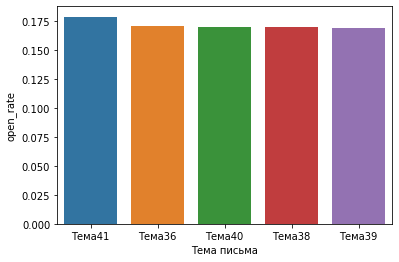

In [ ]:
sns.barplot(data=top_5.head(), x='Тема письма', y='open_rate');

В том 5 тем письма по open_rate вошли темы 41, 36, 40, 38, 39. Так же можно посмотреть топ-10. 

**Динамика open rate, CR, AOV**




In [ ]:
df1 = data.groupby(by='month').mean().sort_values(by='month', ascending=False)

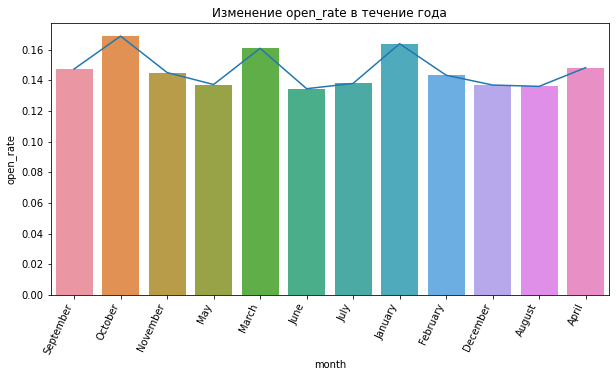

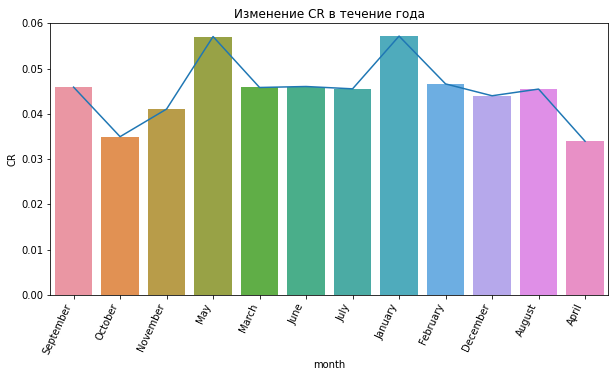

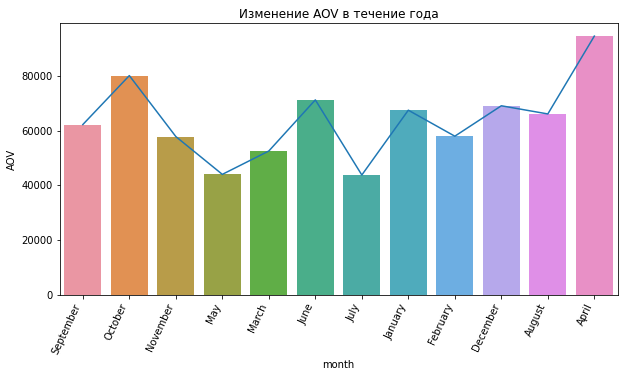

In [ ]:
#fig, axs = plt.subplots(nrows= 1 , ncols= 3 )
metric = ['open_rate','CR', 'AOV']
for i in metric:
  fig = plt.figure(figsize=(10, 5))
  sns.lineplot(data=df1, x=df1.index, y =i).set(title= f'Изменение {i} в течение года')
  sns.barplot(data=df1, x=df1.index, y = i);
  plt.xticks(rotation=65, horizontalalignment='right');

Выводы из графиков:

open_rate: 
1. в течение всего года open_rate находится приблизительно на уровне 0.14-0.16.
2. Самый высокий open_rate достигнут в октябре месяце.

CR:
1. Наиболее высокое значение CR в мае и январе
2. Наименьшее в апреле и октябре

AOV:
1. Самый высокий показатель в апреле
2. Самый низкий в мае и июле.

Интересно отметить, что CR минимальный в апреле, а AOV в этом месяце максимально, следовательно в апреле месяце был совершен заказ на крупную сумму. 

Что бы посмотреть статистику метрик в течение кажого месяца напишем функцию, которая будет принимать в качестве аргументов месяц и метрику и возвращать график описывающий динамику за месяц

In [ ]:
def metric_by_month(month, metric):
  dt = data[data['month'] == month]
  fig = plt.figure(figsize=(10, 5))
  sns.barplot(data=dt, x='Дата рассылки', y = metric).set(title=f'Изменение {metric} за {month} месяц');
  plt.xticks(rotation=65, horizontalalignment='right');

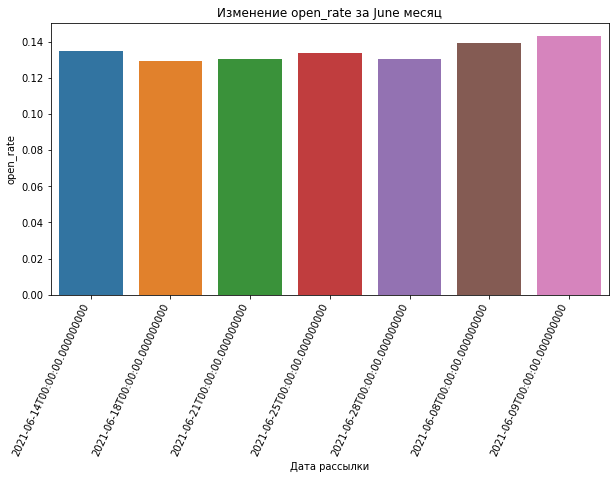

In [ ]:
metric_by_month('June', 'open_rate')

**Динамика click to open_rate**

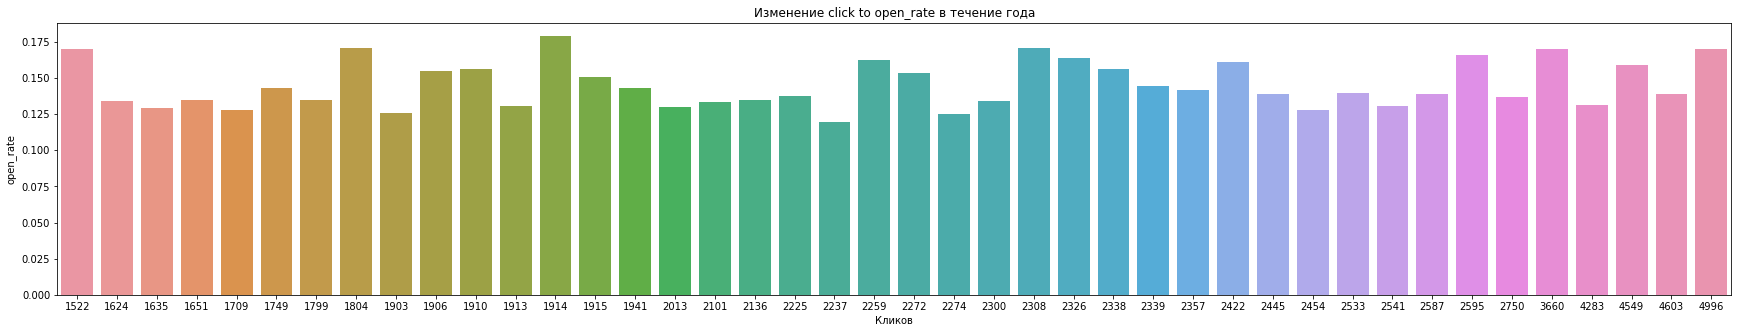

In [ ]:
fig = plt.figure(figsize=(30, 5))
sns.barplot(data=data, x='Кликов', y ='open_rate').set(title= f'Изменение click to open_rate в течение года');

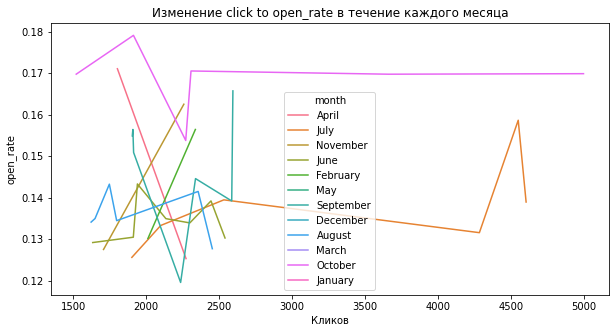

In [ ]:
fig = plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='Кликов', y ='open_rate', hue='month').set(title= f'Изменение click to open_rate в течение каждого месяца');

**Динамика оттока базы за год**

При изученик динамики оттока базы за год в качетсве агрегирующей функции необходимо выбрать сумму, а не среднее. В этом случае нам важно видеть всех людей которые отписались от продукта. 

In [ ]:
df2 = data.groupby('month').sum()

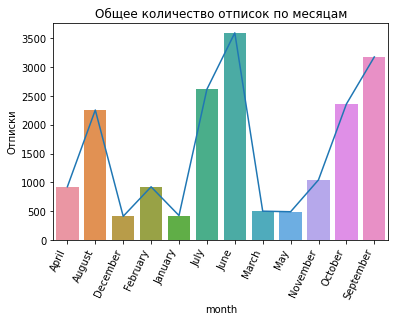

In [ ]:
sns.lineplot(data=df2, x=df2.index, y ='Отписки').set(title= 'Общее количество отписок по месяцам')
sns.barplot(data=df2, x=df2.index, y ='Отписки');
plt.xticks(rotation=65, horizontalalignment='right');

Можно отметить, что больше всего человек отписалось в летние месяцы, а меньше всего в декабре и январе.

**Определим лучший день недели для отправки писем**

In [ ]:
top_day = data.groupby('day').median()

In [ ]:
top_day.sort_values(by=['AOV'], ascending=False)

,open_rate,Кликов,AOV,CR,Отписки,Доход
day,,,,,,
Monday,0.134948,1914.0,64836.323232,0.044071,475.0,5777841.0
Friday,0.138078,2323.5,61092.431457,0.043615,424.0,6603341.0
Sunday,0.160115,2332.0,59223.415943,0.050617,422.0,7111330.0
Tuesday,0.139218,2422.0,55915.096000,0.045830,440.0,6907996.0
Saturday,0.153769,1804.0,50836.900000,0.036972,485.0,4044655.0
Wednesday,0.143305,2259.0,44129.941748,0.053065,540.0,6023157.0


На мой вгляд лучший день недели для отправки писем, тот в которой больше всего совершают покупок, следовательно выше CR и доход. Таким образом наилучший день **Восресенье**. В этот день также минимальное количество отписок.